In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error


In [3]:
df = pd.read_csv('dress_rental_prices.csv')

In [4]:
df

,Unnamed: 0,ID,Name,Brand,Colour,Catagories,Price
0,0,74416,Runway stripe dress,Stella McCartney,beige,dresses,111
1,1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
2,2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
3,3,73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37
4,4,73605,Ellen,RIXO,beige,dresses,47
...,...,...,...,...,...,...,...
29992,29992,872,Silk and wool-blend crepe dress yellow,Victoria Beckham,yellow,"dresses, Smart, midi, Short Sleeve, Pencil, Mo...",102
29993,29993,871,La Guardia Matching Set,Faithfull The Brand,yellow,"dresses, Floral, Polka Dot, Loose, Smart Casua...",43
29994,29994,844,One-shoulder ruffled crepe mini dress,Solace London,yellow,"dresses, Vinyl-PVC-Synthetics, Smart, Formal, ...",75
29995,29995,592,Billie Dress,Rebecca Vallance,yellow,"dresses, Cotton-Jersey, Tie-Front, Skinny-Fit,...",42


In [5]:
brand_counts = df['Brand'].value_counts()

In [6]:
filtered_df = df[df['Brand'].isin(brand_counts[brand_counts >= 50].index)]

In [7]:
filtered_df.head()

,Unnamed: 0,ID,Name,Brand,Colour,Catagories,Price
1,1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
2,2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
4,4,73605,Ellen,RIXO,beige,dresses,47
5,5,73583,Elena Dress Crystal Garden,Stine Goya,beige,dresses,64
6,6,73007,OBlanc Dress,New Arrivals,beige,dresses,145


In [8]:
filtered_df = filtered_df.drop(columns=['Unnamed: 0'])


In [9]:
filtered_df

,ID,Name,Brand,Colour,Catagories,Price
1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
4,73605,Ellen,RIXO,beige,dresses,47
5,73583,Elena Dress Crystal Garden,Stine Goya,beige,dresses,64
6,73007,OBlanc Dress,New Arrivals,beige,dresses,145
...,...,...,...,...,...,...
29990,1245,Cameron Floral-Print Satin Dress,Ganni,yellow,"dresses, Wrap, Seasonal, Maxi, Long Sleeve, V-...",33
29992,872,Silk and wool-blend crepe dress yellow,Victoria Beckham,yellow,"dresses, Smart, midi, Short Sleeve, Pencil, Mo...",102
29993,871,La Guardia Matching Set,Faithfull The Brand,yellow,"dresses, Floral, Polka Dot, Loose, Smart Casua...",43
29994,844,One-shoulder ruffled crepe mini dress,Solace London,yellow,"dresses, Vinyl-PVC-Synthetics, Smart, Formal, ...",75


In [10]:
missing_values = filtered_df.isnull().sum()


In [11]:
summary = filtered_df.describe(include='all')

# Check the unique values in categorical columns
brand_unique = filtered_df['Brand'].unique()
colour_unique = filtered_df['Colour'].unique()
categories_unique = filtered_df['Catagories'].unique()

missing_values, summary, brand_unique, colour_unique, categories_unique

(ID             0
 Name           1
 Brand          0
 Colour         0
 Catagories    81
 Price          0
 dtype: int64,
                   ID                 Name  Brand Colour Catagories  \
 count   23395.000000                23394  23395  23395      23314   
 unique           NaN                19727     92     20       4003   
 top              NaN  The Alexandra Dress   RIXO  black    dresses   
 freq             NaN                   31   2956   3508      19157   
 mean    42567.160291                  NaN    NaN    NaN        NaN   
 std     19567.074151                  NaN    NaN    NaN        NaN   
 min       122.000000                  NaN    NaN    NaN        NaN   
 25%     27639.500000                  NaN    NaN    NaN        NaN   
 50%     42544.000000                  NaN    NaN    NaN        NaN   
 75%     60043.000000                  NaN    NaN    NaN        NaN   
 max     75024.000000                  NaN    NaN    NaN        NaN   
 
                Price  

In [12]:
# Drop rows with missing values in 'Name' and 'Catagories'
df_cleaned = filtered_df.dropna(subset=['Name', 'Catagories'])

# Check if missing values have been handled
missing_values_after = df_cleaned.isnull().sum()

# Display the shape of the cleaned dataframe
df_cleaned_shape = df_cleaned.shape

missing_values_after, df_cleaned_shape


(ID            0
 Name          0
 Brand         0
 Colour        0
 Catagories    0
 Price         0
 dtype: int64,
 (23313, 6))

In [13]:
df_cleaned

,ID,Name,Brand,Colour,Catagories,Price
1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
4,73605,Ellen,RIXO,beige,dresses,47
5,73583,Elena Dress Crystal Garden,Stine Goya,beige,dresses,64
6,73007,OBlanc Dress,New Arrivals,beige,dresses,145
...,...,...,...,...,...,...
29990,1245,Cameron Floral-Print Satin Dress,Ganni,yellow,"dresses, Wrap, Seasonal, Maxi, Long Sleeve, V-...",33
29992,872,Silk and wool-blend crepe dress yellow,Victoria Beckham,yellow,"dresses, Smart, midi, Short Sleeve, Pencil, Mo...",102
29993,871,La Guardia Matching Set,Faithfull The Brand,yellow,"dresses, Floral, Polka Dot, Loose, Smart Casua...",43
29994,844,One-shoulder ruffled crepe mini dress,Solace London,yellow,"dresses, Vinyl-PVC-Synthetics, Smart, Formal, ...",75


In [14]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split the 'Catagories' column into lists
df_cleaned['Catagories'] = df_cleaned['Catagories'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the 'Catagories' column
catagory_encoded = mlb.fit_transform(df_cleaned['Catagories'])

# Create a dataframe from the encoded categories
catagory_encoded_df = pd.DataFrame(catagory_encoded, columns=mlb.classes_)

# Concatenate the encoded categories with the original dataframe (excluding 'Catagories' column)
df_encoded = pd.concat([df_cleaned.drop(columns=['Catagories']), catagory_encoded_df], axis=1)

df_encoded.head()


C:\Users\sumer\AppData\Local\Temp\ipykernel_10368\3714304185.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Catagories'] = df_cleaned['Catagories'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])


,ID,Name,Brand,Colour,Price,3/4 Sleeves,3/4 sleeve,A-Line,Animal Print,Baby Blue,...,turqoise,v neck,victorian,waist,wash,wedding,wedding guest,yellow,zebra,zimmerman
1,73815.0,Reformation Kourtney Dress,Reformation,beige,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,73801.0,Ivory Viola bridal dress,Ghost,beige,75.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,73605.0,Ellen,RIXO,beige,47.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,73583.0,Elena Dress Crystal Garden,Stine Goya,beige,64.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,73007.0,OBlanc Dress,New Arrivals,beige,145.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Get a summary of the dataframe to understand the distribution
summary_encoded = df_encoded.describe(include='all')
print(summary_encoded)


                  ID                 Name  Brand Colour         Price  \
count   23313.000000                23313  23313  23313  23313.000000   
unique           NaN                19668     92     20           NaN   
top              NaN  The Alexandra Dress   RIXO  black           NaN   
freq             NaN                   31   2950   3498           NaN   
mean    42594.440999                  NaN    NaN    NaN     57.179042   
std     19570.390055                  NaN    NaN    NaN     31.293148   
min       122.000000                  NaN    NaN    NaN     11.000000   
25%     27676.000000                  NaN    NaN    NaN     40.000000   
50%     42598.000000                  NaN    NaN    NaN     49.000000   
75%     60057.000000                  NaN    NaN    NaN     64.000000   
max     75024.000000                  NaN    NaN    NaN    793.000000   

         3/4 Sleeves    3/4 sleeve        A-Line  Animal Print     Baby Blue  \
count   23313.000000  23313.000000  23313.0

In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to 'Name'
df_encoded['Name'] = label_encoder.fit_transform(df_encoded['Name'])

# Apply label encoding to 'Brand'
df_encoded['Brand'] = label_encoder.fit_transform(df_encoded['Brand'])

# Apply label encoding to 'Colour'
df_encoded['Colour'] = label_encoder.fit_transform(df_encoded['Colour'])

# Check the result
print(df_encoded.head())


        ID   Name  Brand  Colour  Price  3/4 Sleeves  3/4 sleeve  A-Line  \
1  73815.0  13746     62       0   50.0          0.0         0.0     0.0   
2  73801.0   7887     29       0   75.0          0.0         0.0     0.0   
4  73605.0   5027     56       0   47.0          0.0         0.0     0.0   
5  73583.0   4966     79       0   64.0          0.0         0.0     0.0   
6  73007.0  11780     50       0  145.0          0.0         0.0     0.0   

   Animal Print  Baby Blue  ...  turqoise  v neck  victorian  waist  wash  \
1           0.0        0.0  ...       0.0     0.0        0.0    0.0   0.0   
2           0.0        0.0  ...       0.0     0.0        0.0    0.0   0.0   
4           0.0        0.0  ...       0.0     0.0        0.0    0.0   0.0   
5           0.0        0.0  ...       0.0     0.0        0.0    0.0   0.0   
6           0.0        0.0  ...       0.0     0.0        0.0    0.0   0.0   

   wedding  wedding guest  yellow  zebra  zimmerman  
1      0.0            0.0 

In [17]:
df_encoded.drop(columns=['ID'],inplace=True)

In [18]:
import pandas as pd

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Set the threshold for high correlation
threshold = 0.9

# Find features with high correlation
high_corr_var = np.where(correlation_matrix.abs() > threshold)
high_corr_pairs = [(correlation_matrix.columns[x], correlation_matrix.columns[y]) 
                    for x, y in zip(*high_corr_var) if x != y and x < y]

# Create a set to keep track of features to drop
features_to_drop = set()

for var1, var2 in high_corr_pairs:
    if var1 not in features_to_drop and var2 not in features_to_drop:
        # Keep the feature with the highest correlation with the target variable
        if correlation_matrix['Price'][var1] > correlation_matrix['Price'][var2]:
            features_to_drop.add(var2)
        else:
            features_to_drop.add(var1)

# Drop the highly correlated features
df_reduced = df_encoded.drop(columns=features_to_drop)

# Display the new shape of the DataFrame
print(f"Reduced DataFrame shape: {df_reduced.shape}")

# Optional: Check the correlation matrix of the reduced DataFrame
reduced_correlation_matrix = df_reduced.corr()
print(reduced_correlation_matrix)


Reduced DataFrame shape: (28501, 224)
                   Name     Brand    Colour     Price  3/4 Sleeves  \
Name           1.000000  0.379490  0.402373  0.014838     0.000708   
Brand          0.379490  1.000000  0.392990  0.052436     0.002240   
Colour         0.402373  0.392990  1.000000  0.023521     0.004072   
Price          0.014838  0.052436  0.023521  1.000000     0.003578   
3/4 Sleeves    0.000708  0.002240  0.004072  0.003578     1.000000   
...                 ...       ...       ...       ...          ...   
wedding        0.002909 -0.004870 -0.002405  0.003715     0.049067   
wedding guest  0.016496  0.002998  0.014666 -0.006234    -0.005867   
yellow        -0.004614  0.001271  0.002707 -0.001516     0.020659   
zebra          0.000918  0.000807  0.003599 -0.005649    -0.001514   
zimmerman      0.007787  0.007961  0.010144       NaN     0.028328   

               3/4 sleeve    A-Line  Animal Print  Baby Blue   Bandage  ...  \
Name            -0.016105  0.004119     -0

In [20]:
# Drop rows with any missing values
df_encoded_clean = df_encoded.dropna()

# Check the new shape of the dataframe
print(df_encoded_clean.shape)


(18125, 280)


In [21]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded_clean)


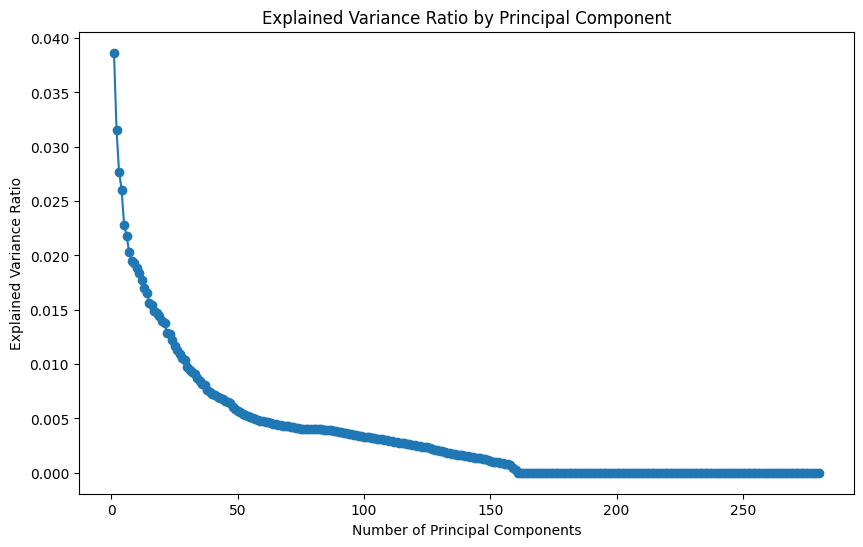

Number of components to keep for 95% variance: 125
Reduced DataFrame shape: (18125, 125)


In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Initialize PCA
pca = PCA()

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Determine the number of components to keep for 95% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components to keep for 95% variance: {n_components}")

# Transform the data with the selected number of components
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)

# Display the shape of the reduced DataFrame
print(f"Reduced DataFrame shape: {X_reduced.shape}")


In [23]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = X_reduced
y = df_encoded_clean['Price']  # Assuming 'Price' is the target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 19074.392788459845
R-squared Score: -21.502986263420794


In [25]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)


print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R-squared Score: {r2_xgb}")
print(f"XGBoost Mean Absolute Error: {mae_xgb}")

XGBoost Mean Squared Error: 59.84341491391572
XGBoost R-squared Score: 0.9293998210743163
XGBoost Mean Absolute Error: 3.30580408556708


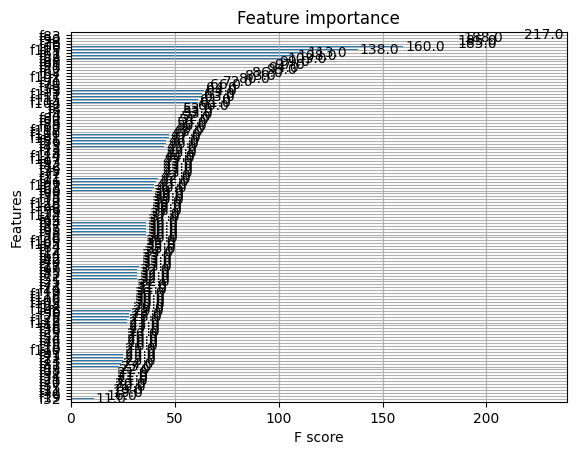

In [26]:
import matplotlib.pyplot as plt

# Plot feature importances
xgb.plot_importance(xgb_model)
plt.show()